### classify the Size_Categorie using SVM 

#### Importing Libearies 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import pyplot 
import altair as alt 

#### Importing Dataset 

In [3]:
data = pd.read_csv('F://Data_Set/forestfires.csv',usecols=['month','day','FFMC','DMC','DC','ISI',
                    'temp','RH','wind','rain','area','size_category'])  

In [4]:
data.head() 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


Check Information of Dataset 

In [15]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


Check any Null Value Present in the Dataset or Not 

In [16]:
data.isnull().sum() 

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [17]:
data.shape 

(517, 12)

In [6]:
dataframe = data.copy() 

#### Encode Data

In [7]:
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [20]:
dataframe['size_category'].unique() 

array(['small', 'large'], dtype=object)

In [21]:
dataframe.size_category.replace(('large','small'),(0,1), inplace=True) 

In [22]:
dataframe.head()     

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


#### Exploratory Data Analysis

Skewness of the size_category in the dataframe

<IPython.core.display.Javascript object>

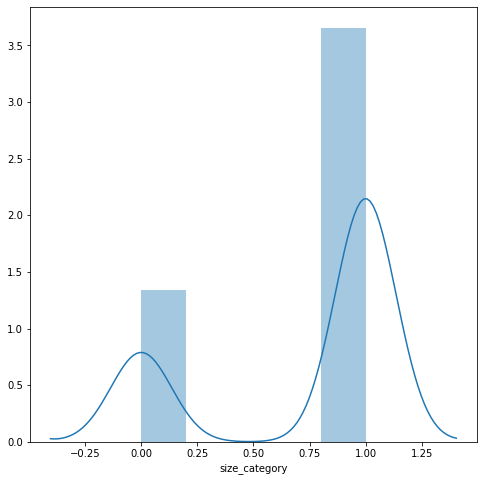

In [11]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(dataframe['size_category']);  

Month Vs Temperature Barplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

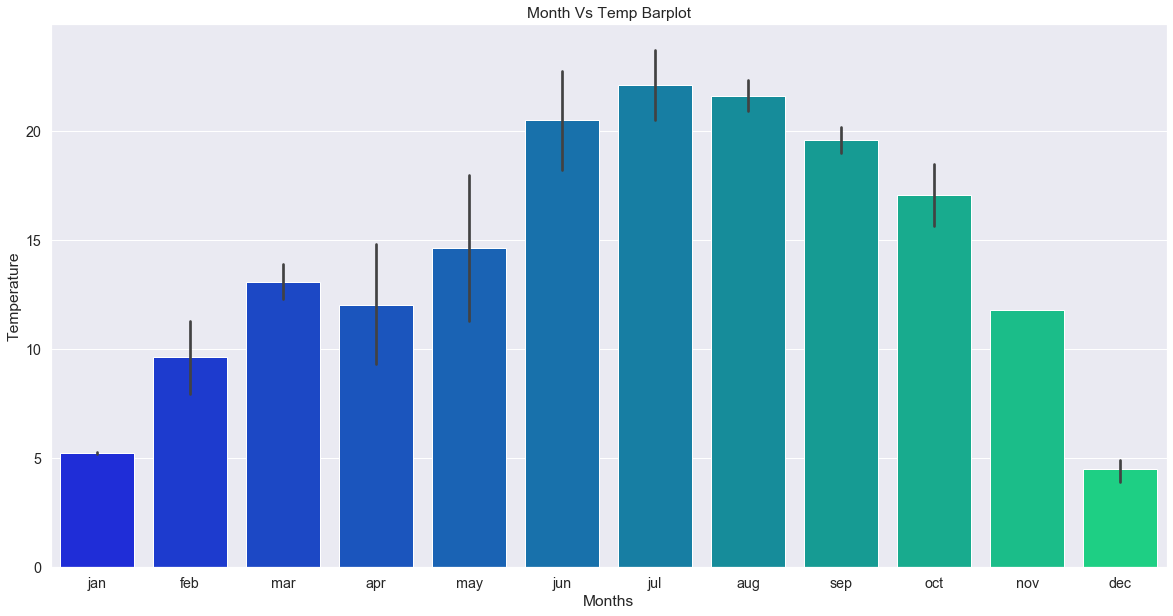

In [13]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data, 
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
                         ,palette = 'winter'); 
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

Bar graph of area vs month

In [8]:
month_count = data[['month', 'area']]

month_count = month_count.groupby('month').sum()

month_count['month'] = month_count.index

month_count.index = range(month_count.shape[0])

month_count.head(4) 

,area,month
0,80.02,apr
1,2297.99,aug
2,119.97,dec
3,125.50,feb


In [9]:
bar_graph = alt.Chart(month_count).mark_bar(
    color='lightblue'
).encode(
    x='area',
    y='month',
).properties(width=600)

mean_line = alt.Chart(month_count).mark_rule(
    color='black'
).encode(
    x = 'mean(area)'
)

annotation = bar_graph.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='area'
)

bar_graph + mean_line + annotation

alt.LayerChart(...)

Bar Plot of area vs day

In [26]:
day_count = data[['day', 'area']]

day_count = day_count.groupby('day').sum()

day_count['day'] = day_count.index

day_count.index = range(day_count.shape[0])

day_count.head(4) 

,area,day
0,447.24,fri
1,706.53,mon
2,2144.86,sat
3,959.93,sun


In [27]:
bar_graph = alt.Chart(day_count).mark_bar(
    color='lightblue'
).encode(
    x='area',
    y='day',
).properties(width=600)

mean_line = alt.Chart(day_count).mark_rule(
    color='black'
).encode(
    x = 'mean(area)'
)

annotation = bar_graph.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='area'
)

bar_graph + mean_line + annotation 

alt.LayerChart(...)

Countplot for the days in the week 

In [14]:
data.day.unique() 

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

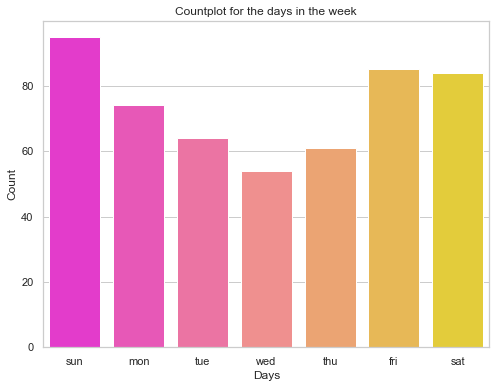

In [39]:
plt.rcParams['figure.figsize'] = [8, 6]     
sns.set(style = 'whitegrid', font_scale = 1)  
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

Scatter Plot between size_category and Temperature 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

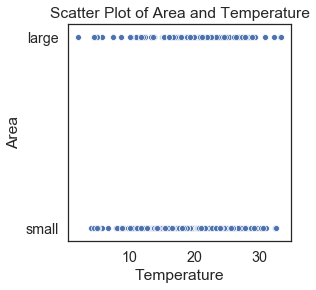

In [36]:
plt.rcParams['figure.figsize'] = [4, 4] 
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(data['temp'], data['size_category'])  
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

#### Correlation Heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

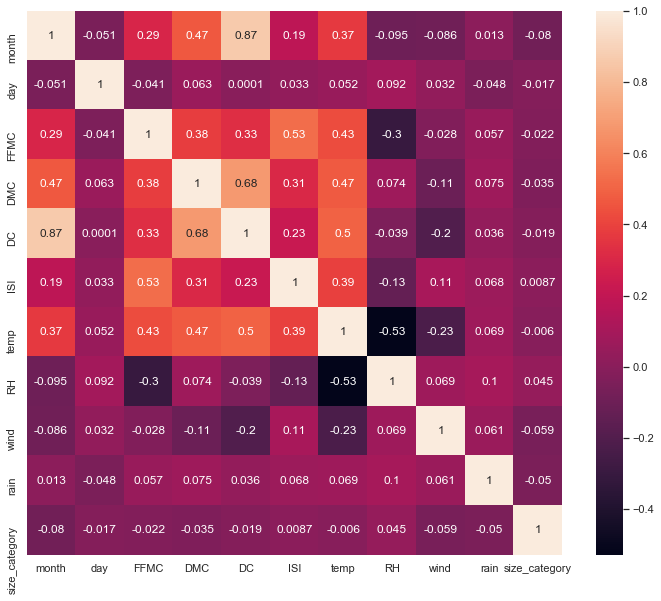

In [17]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(dataframe.corr(), annot = True);  

#### Visualize Numerial Data 

#### Histogram of Numerical Data

Histogram of FFMC

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <a list of 10 Patch objects>)

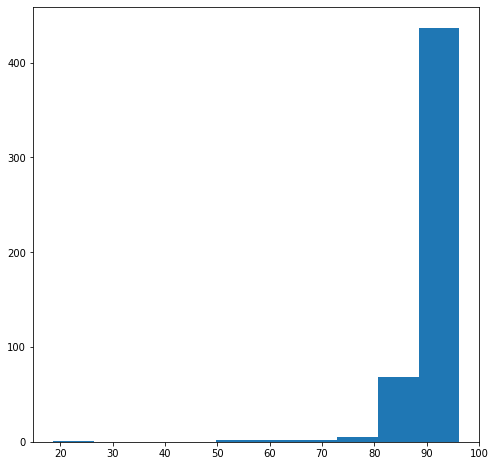

In [28]:
plt.hist(data['FFMC']) 

Histogram of DMC

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <a list of 10 Patch objects>)

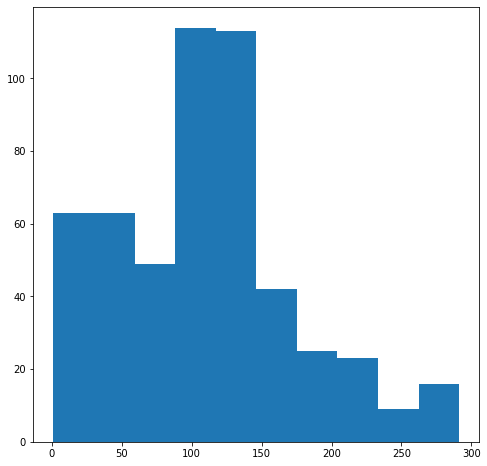

In [29]:
plt.hist(data['DMC']) 

Histogram of DC

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <a list of 10 Patch objects>)

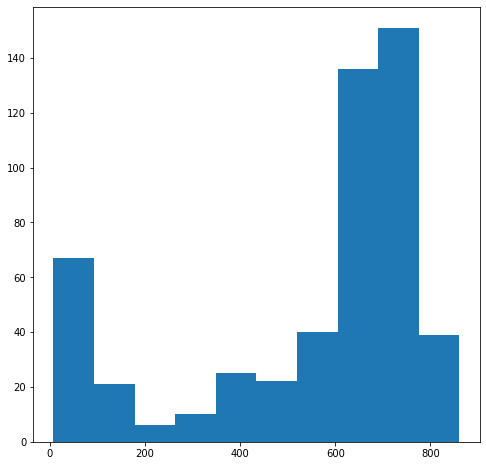

In [30]:
plt.hist(data['DC']) 

Histogram of ISI

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <a list of 10 Patch objects>)

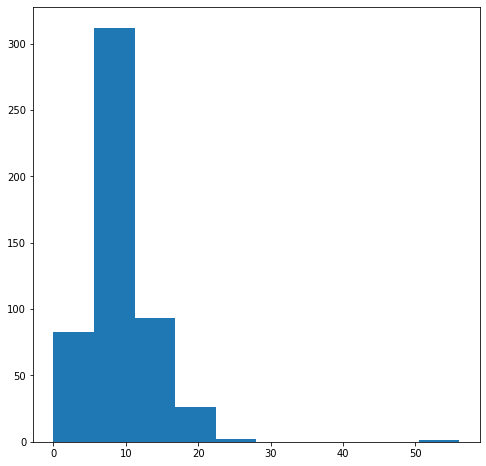

In [31]:
plt.hist(data['ISI']) 

Histogram of temp

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <a list of 10 Patch objects>)

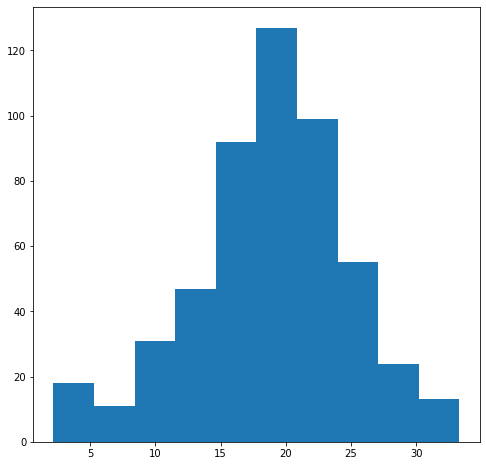

In [32]:
plt.hist(data['temp'])

Histogram of RH

(array([ 21.,  96., 130., 104.,  63.,  40.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <a list of 10 Patch objects>)

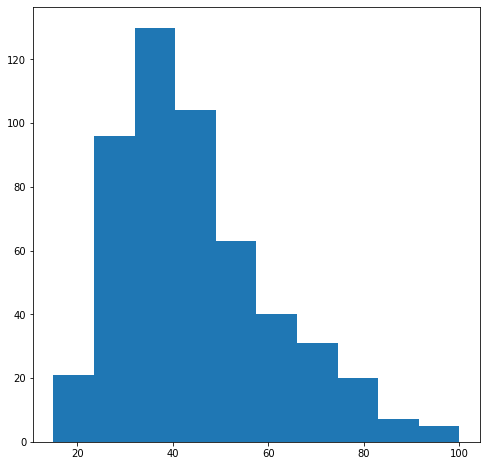

In [33]:
plt.hist(data['RH'])

Histogram of wind

(array([ 14.,  45.,  97.,  93.,  92., 113.,  19.,  26.,   5.,  13.]),
 array([0.4, 1.3, 2.2, 3.1, 4. , 4.9, 5.8, 6.7, 7.6, 8.5, 9.4]),
 <a list of 10 Patch objects>)

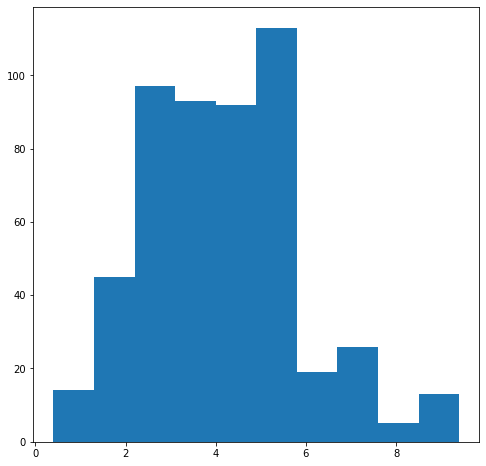

In [34]:
plt.hist(data['wind'])

Histogram of rain 

(array([512.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.64, 1.28, 1.92, 2.56, 3.2 , 3.84, 4.48, 5.12, 5.76, 6.4 ]),
 <a list of 10 Patch objects>)

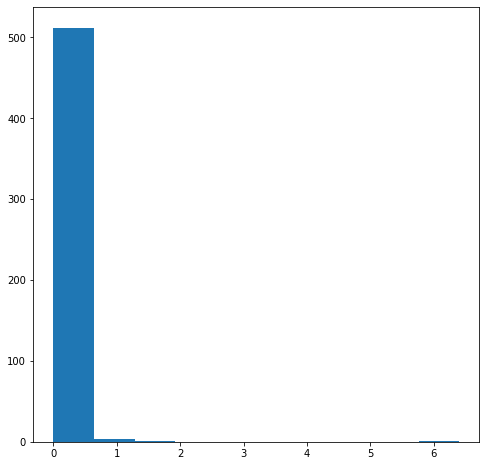

In [35]:
plt.hist(data['rain'])

#### Visualize Categorical Column 

Visualization of size_category Column

<IPython.core.display.Javascript object>

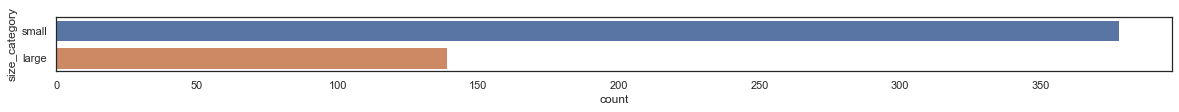

In [18]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="size_category", data=data)  

Visualization of month Column

<IPython.core.display.Javascript object>

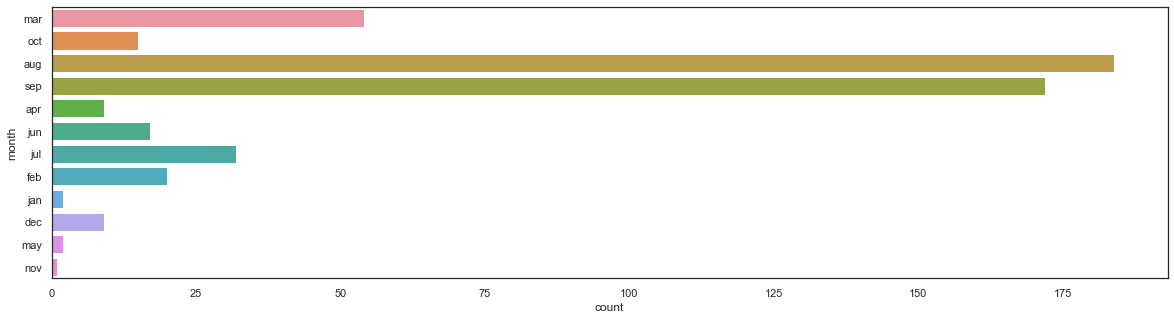

In [21]:
fig = plt.figure(figsize=(20,5))   
plt.style.use('seaborn-ticks')
sns.countplot(y="month", data=data)   

Visualization of Day Column

<IPython.core.display.Javascript object>

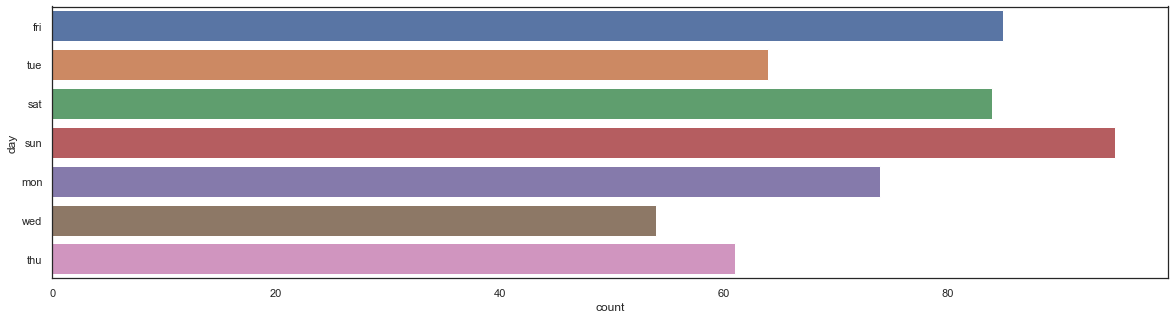

In [22]:
fig = plt.figure(figsize=(20,5))   
plt.style.use('seaborn-ticks')
sns.countplot(y="day", data=data) 

#### violinplot

violinplot of Month vs.size_category 

<IPython.core.display.Javascript object>

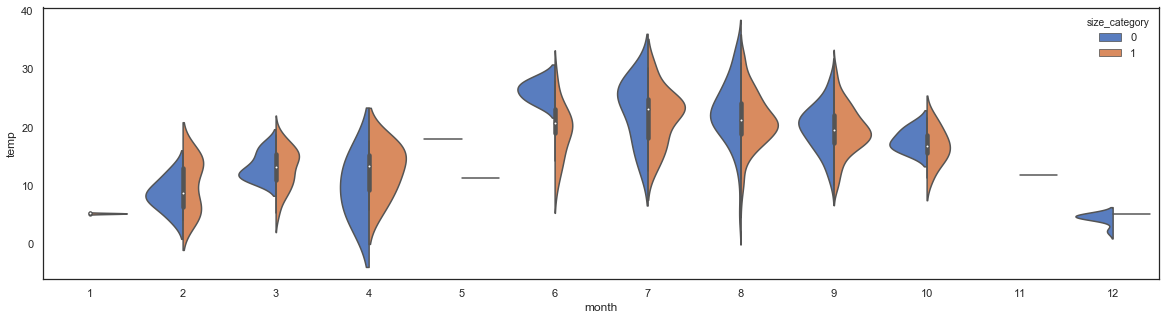

In [27]:
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="month", y="temp", hue="size_category",
                    data=dataframe, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

violinplot of Rain vs Size_category

<IPython.core.display.Javascript object>

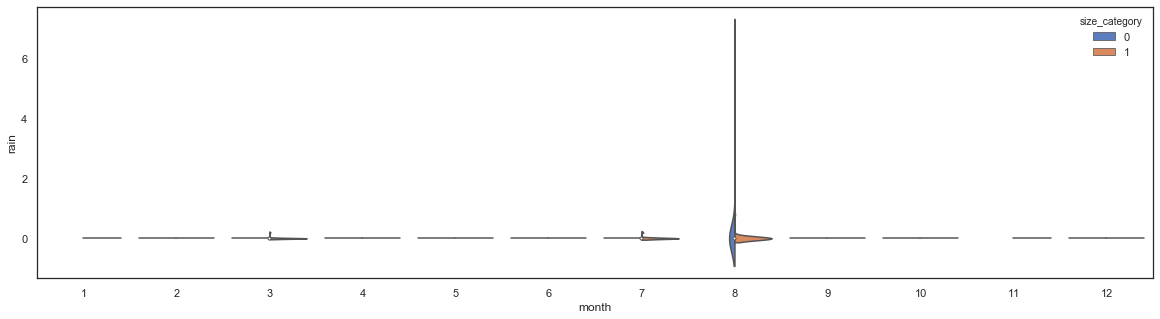

In [28]:
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="month", y="rain", hue="size_category",
                    data=dataframe, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

#### Divide the Dataset in to Dependent and independent Variable 

Independent Variable 

In [17]:
X = dataframe.iloc[:,0:10].values 

Dependent Variable 

In [21]:
Y = dataframe.iloc[:,-1].values 

#### Spliting the Dataset in to traning set and test set 

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=1) 

#### Applay SVC and Genrate the Mode

In [35]:
from sklearn.svm import SVC

In [36]:
svc_classifier = SVC(kernel='linear',random_state=0)

#### Train the Model

In [37]:
svc_classifier.fit(x_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Predict the test set result

In [38]:
y_pred = svc_classifier.predict(x_test) 

In [39]:
y_pred 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

#### To find the Confusion Matrix to check the Correct result

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_pred) 

In [42]:
cm 

array([[ 1, 32],
       [ 0, 97]], dtype=int64)

#### To Check the Accuracy of the Model 

In [43]:
from sklearn.metrics import accuracy_score 

In [44]:
ac = accuracy_score(y_test,y_pred) 

In [45]:
ac 

0.7538461538461538

#### 2nd Model Genration by Standardizing Dataset 

In [39]:
X1 = X.copy()   

In [40]:
X1 

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [41]:
Y1 = Y.copy()   

In [42]:
from sklearn.preprocessing import StandardScaler 

In [43]:
stscaler = StandardScaler().fit(X1) 
X1 = stscaler.transform(X1) 

In [44]:
X1   

array([[-1.96844301,  0.35772091, -0.80595947, ...,  0.41172435,
         1.49861442, -0.07326831],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -0.69245628,
        -1.74175564, -0.07326831],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -0.69245628,
        -1.51828184, -0.07326831],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.57724834,
         1.49861442, -0.07326831],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.14036597,
        -0.00983371, -0.07326831],
       [ 1.54991494, -1.09090867, -2.02087875, ..., -0.81514302,
         0.26950853, -0.07326831]])

#### Dividing dataset into traning set and testing set

In [49]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=1) 

<IPython.core.display.Javascript object>

#### Applay SVM on the Dataset 

In [46]:
from sklearn.svm import SVC 

In [47]:
svc_classifier1 = SVC(kernel='rbf',random_state=0,gamma=.10) 

Train the Model 

In [50]:
svc_classifier1.fit(x1_train,y1_train)   

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#### Predicting Test set result

In [51]:
y_pred1 = svc_classifier1.predict(x1_test) 

In [52]:
y_pred1 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

#### To find the Confusion Matrix to check the Correct result

In [53]:
from sklearn.metrics import confusion_matrix  

In [54]:
cm = confusion_matrix(y1_test,y_pred1) 

In [55]:
cm 

array([[ 1, 32],
       [ 0, 97]], dtype=int64)

#### To find the accuracy of model 

In [58]:
from sklearn.metrics import accuracy_score 

In [59]:
accuracy = accuracy_score(y1_test,y_pred1) 

In [60]:
accuracy 

0.7538461538461538